# Testing Providentia Interpolation and NES Interpolation

In [1]:
import nes
import geopandas as gpd
import matplotlib.pyplot as plt
import copy

In [2]:
%matplotlib inline

## 1. Original model (a4s2)

### 1.1. Read data

In [3]:
# Original path: /esarchive/exp/monarch/a4s2/global/hourly/od550du/od550du-000_2020060100.nc
# Regular lat-lon grid from MONARCH
path_0 = '/gpfs/projects/bsc32/models/NES_tutorial_data/exp_od550du-000_2020060100.nc'

In [4]:
data_model = nes.open_netcdf(path=path_0, info=True)
data_model

In [5]:
data_model.keep_vars(['od550du'])
data_model.load()

Rank 000: Loading od550du var (1/1)
Rank 000: Loaded od550du var ((25, 1, 181, 257))


### 1.2. Create shapefile

In [6]:
data_model.create_shapefile()
data_model.shapefile['od550du'] = data_model.variables['od550du']['data'][0, 0, :].ravel()
data_model.shapefile

geometry   od550du
FID                                                               
0      POLYGON ((-180.70312 -90.50000, -179.29688 -90...  0.000144
1      POLYGON ((-179.29688 -90.50000, -177.89062 -90...  0.000144
2      POLYGON ((-177.89062 -90.50000, -176.48438 -90...  0.000144
3      POLYGON ((-176.48438 -90.50000, -175.07812 -90...  0.000144
4      POLYGON ((-175.07812 -90.50000, -173.67188 -90...  0.000144
...                                                  ...       ...
46512  POLYGON ((173.67188 89.50000, 175.07812 89.500...  0.023041
46513  POLYGON ((175.07812 89.50000, 176.48438 89.500...  0.023041
46514  POLYGON ((176.48438 89.50000, 177.89062 89.500...  0.023041
46515  POLYGON ((177.89062 89.50000, 179.29688 89.500...  0.023041
46516  POLYGON ((179.29688 89.50000, 180.70312 89.500...  0.023041

[46517 rows x 2 columns]

### 1.3. Plot data

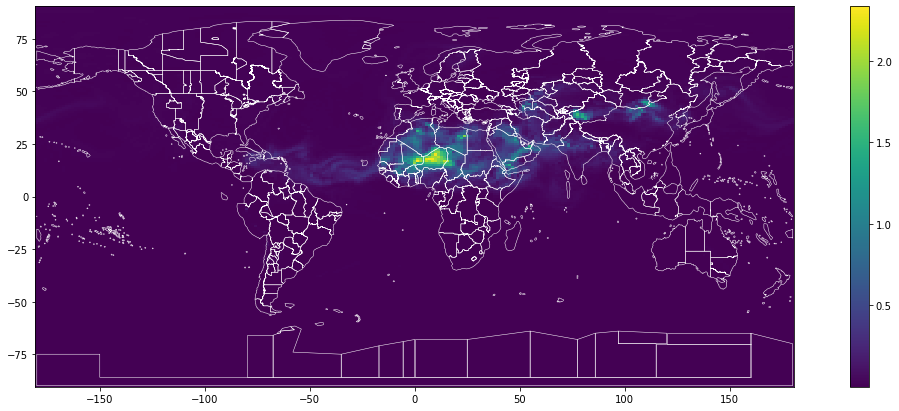

In [7]:
fig, ax = plt.subplots(1, figsize=(20, 7))

gdf_model = data_model.shapefile
gdf_model.plot(ax=ax, column='od550du', cmap='viridis', legend=True)

gdf_earth = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/timezones_2021c/timezones_2021c.shp')
gdf_earth.plot(ax=ax, facecolor="none", edgecolor='white', lw=0.5)

ax.margins(0)

## 2. Observations (AERONET_v3_lev1.5)

### 2.1. Read data

In [8]:
# Original path: /esarchive/obs/ghost/AERONET_v3_lev1.5/1.4/hourly/od550aero/od550aero_202006.nc
# Points grid from AERONET network
path_obs = '/gpfs/projects/bsc32/models/NES_tutorial_data/obs_od550aero_202006.nc'

In [9]:
data_obs = nes.open_netcdf(path=path_obs, info=True)
data_obs

/esarchive/scratch/avilanova/software/NES/nes/load_nes.py:73: UserWarning: Parallel method cannot be 'Y' to create points NES. Setting it to 'X'
  warnings.warn("Parallel method cannot be 'Y' to create points NES. Setting it to 'X'")


In [10]:
data_obs.keep_vars(['od550aero'])
data_obs.load()

Rank 000: Loading od550aero var (1/1)
Rank 000: Loaded od550aero var ((366, 720))


### 2.2. Create shapefile

In [11]:
data_obs.create_shapefile()
data_obs.shapefile['od550aero'] = data_obs.variables['od550aero']['data'][:, 0].ravel()
data_obs.shapefile

geometry  od550aero
FID                                        
0     POINT (109.62880 40.85170)        NaN
1     POINT (-28.02917 39.09109)        NaN
2    POINT (-149.88000 70.49950)        NaN
3     POINT (-97.48562 36.60518)        NaN
4      POINT (40.19450 -2.99600)        NaN
..                           ...        ...
361  POINT (-114.37625 62.45130)        NaN
362   POINT (126.93479 37.56443)   0.152831
363    POINT (-0.88235 41.63340)        NaN
364     POINT (8.99023 13.77668)        NaN
365    POINT (36.77500 55.69500)        NaN

[366 rows x 2 columns]

## 3. Providentia Interpolation (before error)

### 3.1. Read data

In [12]:
# Original path: /gpfs/projects/bsc32/AC_cache/recon/exp_interp/bug_1.4/a4s2-global-000/hourly/od550aero/AERONET_v3_lev1.5/od550aero_202006.nc
# Interpolated experiment to AERONET network from MONARCH (with bug)
path_prv_before = '/gpfs/projects/bsc32/models/NES_tutorial_data/exp_interp_bug_od550aero_202006.nc'

In [13]:
data_prv_before = nes.open_netcdf(path=path_prv_before, info=True)
data_prv_before

/esarchive/scratch/avilanova/software/NES/nes/load_nes.py:73: UserWarning: Parallel method cannot be 'Y' to create points NES. Setting it to 'X'
  warnings.warn("Parallel method cannot be 'Y' to create points NES. Setting it to 'X'")


In [14]:
data_prv_before.keep_vars(['od550aero'])
data_prv_before.load()

Rank 000: Loading od550aero var (1/1)
Rank 000: Loaded od550aero var ((366, 720))


### 3.2. Create shapefile

In [15]:
data_prv_before.create_shapefile()
data_prv_before.shapefile['od550aero'] = data_prv_before.variables['od550aero']['data'][:, 0].ravel()
data_prv_before.shapefile

geometry  od550aero
FID                                        
0     POINT (109.62880 40.85170)   0.227307
1     POINT (-28.02917 39.09109)   0.004195
2    POINT (-149.88000 70.49950)   0.006696
3     POINT (-97.48562 36.60518)   0.005329
4      POINT (40.19450 -2.99600)   0.059810
..                           ...        ...
361  POINT (-114.37625 62.45130)   0.007441
362   POINT (126.93479 37.56443)   0.082251
363    POINT (-0.88235 41.63340)   0.008346
364     POINT (8.99023 13.77668)   0.446823
365    POINT (36.77500 55.69500)   0.006547

[366 rows x 2 columns]

### 3.3. Plot data

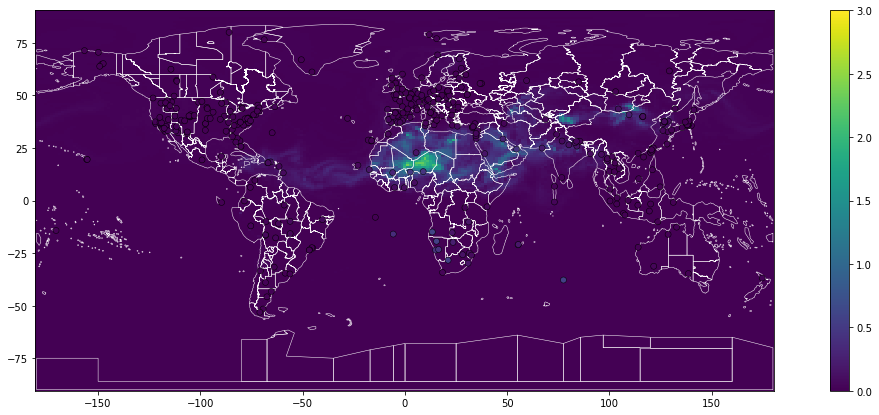

In [16]:
fig_1, ax_1 = plt.subplots(1, figsize=(20, 7))

gdf_model.plot(ax=ax_1, column='od550du', cmap='viridis', legend=True, vmin=0, vmax=3)

gdf_earth.plot(ax=ax_1, facecolor="none", edgecolor='white', lw=0.5)

gdf_prv_before = data_prv_before.shapefile
gdf_prv_before.plot(ax=ax_1, column='od550aero', cmap='viridis', edgecolor='black', lw=0.5, vmin=0, vmax=3)

ax_1.margins(0)

## 4. Providentia Interpolation (after error)

### 4.1. Read data

In [17]:
# Original path: /gpfs/projects/bsc32/AC_cache/recon/exp_interp/1.4/a4s2-global-000/hourly/od550aero/AERONET_v3_lev1.5/od550aero_202006.nc
# Interpolated experiment to AERONET network from MONARCH (without bug)
path_prv_after = '/gpfs/projects/bsc32/models/NES_tutorial_data/exp_interp_od550aero_202006.nc'

In [18]:
data_prv_after = nes.open_netcdf(path=path_prv_after, info=True)
data_prv_after

/esarchive/scratch/avilanova/software/NES/nes/load_nes.py:73: UserWarning: Parallel method cannot be 'Y' to create points NES. Setting it to 'X'
  warnings.warn("Parallel method cannot be 'Y' to create points NES. Setting it to 'X'")


In [19]:
data_prv_after.keep_vars(['od550aero'])
data_prv_after.load()

Rank 000: Loading od550aero var (1/1)
Rank 000: Loaded od550aero var ((366, 720))


### 4.2. Create shapefile

In [20]:
data_prv_after.create_shapefile()
data_prv_after.shapefile['od550aero'] = data_prv_after.variables['od550aero']['data'][:, 0].ravel()
data_prv_after.shapefile

geometry  od550aero
FID                                        
0     POINT (109.62880 40.85170)   0.504757
1     POINT (-28.02917 39.09109)   0.007563
2    POINT (-149.88000 70.49950)   0.013467
3     POINT (-97.48562 36.60518)   0.011034
4      POINT (40.19450 -2.99600)   0.002979
..                           ...        ...
361  POINT (-114.37625 62.45130)   0.014462
362   POINT (126.93479 37.56443)   0.184404
363    POINT (-0.88235 41.63340)   0.018486
364     POINT (8.99023 13.77668)   0.900909
365    POINT (36.77500 55.69500)   0.013143

[366 rows x 2 columns]

### 4.3. Plot data

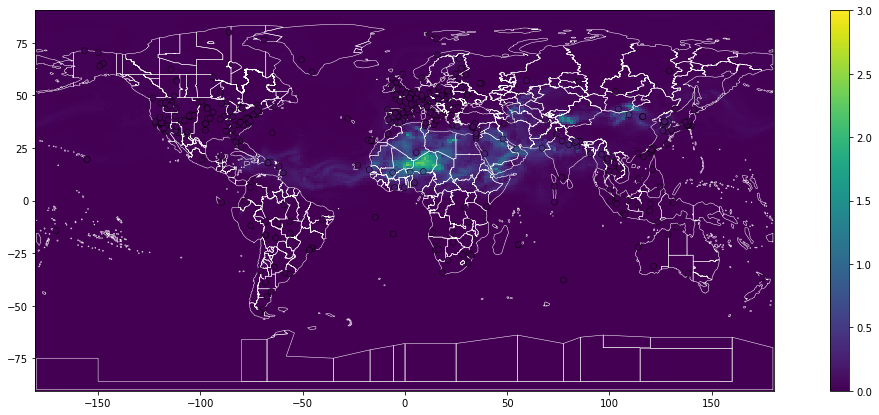

In [21]:
fig_2, ax_2 = plt.subplots(1, figsize=(20, 7))

gdf_model.plot(ax=ax_2, column='od550du', cmap='viridis', legend=True, vmin=0, vmax=3)

gdf_earth.plot(ax=ax_2, facecolor="none", edgecolor='white', lw=0.5)

gdf_prv_after = data_prv_after.shapefile
gdf_prv_after.plot(ax=ax_2, column='od550aero', cmap='viridis', edgecolor='black', lw=0.5, vmin=0, vmax=3)

ax_2.margins(0)

In [22]:
diff = data_prv_before.variables['od550aero']['data'] - data_prv_after.variables['od550aero']['data']
diff

array([[-0.27745032, -0.33557633, -0.39707237, ..., -0.02371369,
        -0.02375146, -0.02365999],
       [-0.00336807, -0.00303048, -0.00253099, ..., -0.00627814,
        -0.00588607, -0.00548861],
       [-0.00677101, -0.00678938, -0.00670995, ..., -0.00168319,
        -0.0017733 , -0.00185721],
       ...,
       [-0.01014002, -0.01006637, -0.01026233, ..., -0.04439881,
        -0.04458728, -0.04401928],
       [-0.4540865 , -0.4427302 , -0.4316749 , ..., -0.5309974 ,
        -0.52981824, -0.526042  ],
       [-0.00659596, -0.0059174 , -0.0054107 , ..., -0.00239577,
        -0.00239077, -0.00250021]], dtype=float32)

## 5. NES Interpolation

### 5.1. Interpolate

In [23]:
data_nes = data_model.interpolate_horizontal(data_obs, weight_matrix_path=None, 
                                             kind='NearestNeighbour', n_neighbours=4,
                                             info=True, to_providentia=True)

Creating Weight Matrix
Weight Matrix done!
Applying weights
	od550du horizontal interpolation
Formatting


In [24]:
data_nes.variables

{'od550du': {'data': array([[0.50475728, 0.63564274, 0.79752713, ..., 0.59597564, 0.5582657 ,
          0.54280552],
         [0.00756297, 0.00732296, 0.00696342, ..., 0.01266858, 0.01230505,
          0.01215943],
         [0.01346747, 0.01355799, 0.01349523, ..., 0.01335665, 0.01338057,
          0.01345622],
         ...,
         [0.01848554, 0.01946019, 0.02101676, ..., 0.02690396, 0.02741605,
          0.0283956 ],
         [0.90090905, 0.88688139, 0.87311261, ..., 0.841753  , 0.86948918,
          0.89742322],
         [0.0131431 , 0.01134514, 0.01024295, ..., 0.00430793, 0.00383704,
          0.00347976]]), 'dimensions': ('station', 'time')}}

### 5.2. Create shapefile

In [25]:
data_nes.create_shapefile()
data_nes.shapefile['od550du'] = data_nes.variables['od550du']['data'][:, 0].ravel()
data_nes.shapefile

geometry   od550du
FID                                       
0     POINT (109.62880 40.85170)  0.504757
1     POINT (-28.02917 39.09109)  0.007563
2    POINT (-149.88000 70.49950)  0.013467
3     POINT (-97.48562 36.60518)  0.011034
4      POINT (40.19450 -2.99600)  0.002979
..                           ...       ...
361  POINT (-114.37625 62.45130)  0.014462
362   POINT (126.93479 37.56443)  0.184404
363    POINT (-0.88235 41.63340)  0.018486
364     POINT (8.99023 13.77668)  0.900909
365    POINT (36.77500 55.69500)  0.013143

[366 rows x 2 columns]

### 5.3. Plot data

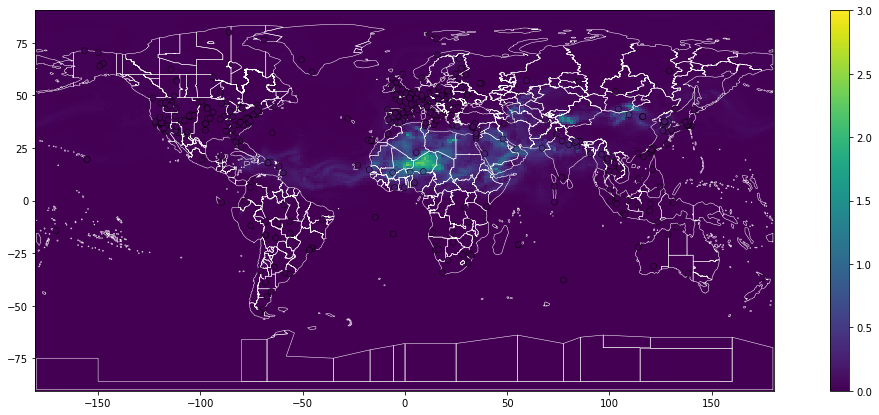

In [26]:
fig_3, ax_3 = plt.subplots(1, figsize=(20, 7))

gdf_model.plot(ax=ax_3, column='od550du', cmap='viridis', legend=True, vmin=0, vmax=3)

gdf_earth.plot(ax=ax_3, facecolor="none", edgecolor='white', lw=0.5)

gdf_nes = data_nes.shapefile
gdf_nes.plot(ax=ax_3, column='od550du', cmap='viridis', edgecolor='black', lw=0.5, vmin=0, vmax=3)

ax_3.margins(0)

## 6. Difference between Providentia Interpolation and NES

### 6.1. Visual comparison

In [27]:
gdf_diff = gdf_prv_after.copy().rename(columns={'od550aero': 'providentia'})[['geometry', 'providentia']]

In [28]:
gdf_diff['nes'] = gdf_nes['od550du']
gdf_diff['obs'] = data_obs.shapefile['od550aero']

#### 6.1.1. Absolute difference

In [29]:
gdf_diff['absolute_difference'] = gdf_diff['nes'] - gdf_diff['providentia']
gdf_diff

geometry  providentia       nes       obs  \
FID                                                                 
0     POINT (109.62880 40.85170)     0.504757  0.504757       NaN   
1     POINT (-28.02917 39.09109)     0.007563  0.007563       NaN   
2    POINT (-149.88000 70.49950)     0.013467  0.013467       NaN   
3     POINT (-97.48562 36.60518)     0.011034  0.011034       NaN   
4      POINT (40.19450 -2.99600)     0.002979  0.002979       NaN   
..                           ...          ...       ...       ...   
361  POINT (-114.37625 62.45130)     0.014462  0.014462       NaN   
362   POINT (126.93479 37.56443)     0.184404  0.184404  0.152831   
363    POINT (-0.88235 41.63340)     0.018486  0.018486       NaN   
364     POINT (8.99023 13.77668)     0.900909  0.900909       NaN   
365    POINT (36.77500 55.69500)     0.013143  0.013143       NaN   

     absolute_difference  
FID                       
0          -6.329158e-09  
1           3.951382e-11  
2          -6.039905e-11  
3           2.067994e-10  
4          -3.650107e-11  
..                   ...  
361         1.836392e-10  
362         5.078100e-09  
363        -8.104343e-11  
364        -2.038381e-08  
365         1.533717e-10  

[366 rows x 5 columns]

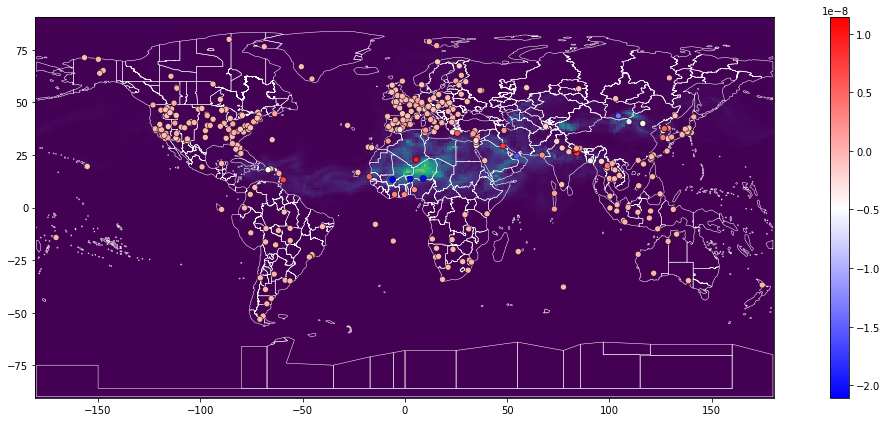

In [30]:
fig_4, ax_4 = plt.subplots(1, figsize=(20, 7))

gdf_model.plot(ax=ax_4, column='od550du', cmap='viridis', vmin=0, vmax=3)

gdf_earth.plot(ax=ax_4, facecolor="none", edgecolor='white', lw=0.5)

gdf_diff.plot(ax=ax_4, column='absolute_difference', cmap='bwr', edgecolor='black', legend=True, lw=0.5)

ax_4.margins(0)

In [31]:
gdf_diff['absolute_difference'].min()

-2.1082139034511727e-08

In [32]:
gdf_diff['absolute_difference'].max()

1.1416417144971547e-08

#### 6.1.2. Relative difference

In [33]:
gdf_diff['relative_difference'] = (gdf_diff['nes'] - gdf_diff['providentia'])*100/gdf_diff['nes']
gdf_diff

geometry  providentia       nes       obs  \
FID                                                                 
0     POINT (109.62880 40.85170)     0.504757  0.504757       NaN   
1     POINT (-28.02917 39.09109)     0.007563  0.007563       NaN   
2    POINT (-149.88000 70.49950)     0.013467  0.013467       NaN   
3     POINT (-97.48562 36.60518)     0.011034  0.011034       NaN   
4      POINT (40.19450 -2.99600)     0.002979  0.002979       NaN   
..                           ...          ...       ...       ...   
361  POINT (-114.37625 62.45130)     0.014462  0.014462       NaN   
362   POINT (126.93479 37.56443)     0.184404  0.184404  0.152831   
363    POINT (-0.88235 41.63340)     0.018486  0.018486       NaN   
364     POINT (8.99023 13.77668)     0.900909  0.900909       NaN   
365    POINT (36.77500 55.69500)     0.013143  0.013143       NaN   

     absolute_difference  relative_difference  
FID                                            
0          -6.329158e-09        -1.253901e-06  
1           3.951382e-11         5.224647e-07  
2          -6.039905e-11        -4.484809e-07  
3           2.067994e-10         1.874285e-06  
4          -3.650107e-11        -1.225091e-06  
..                   ...                  ...  
361         1.836392e-10         1.269820e-06  
362         5.078100e-09         2.753794e-06  
363        -8.104343e-11        -4.384152e-07  
364        -2.038381e-08        -2.262583e-06  
365         1.533717e-10         1.166937e-06  

[366 rows x 6 columns]

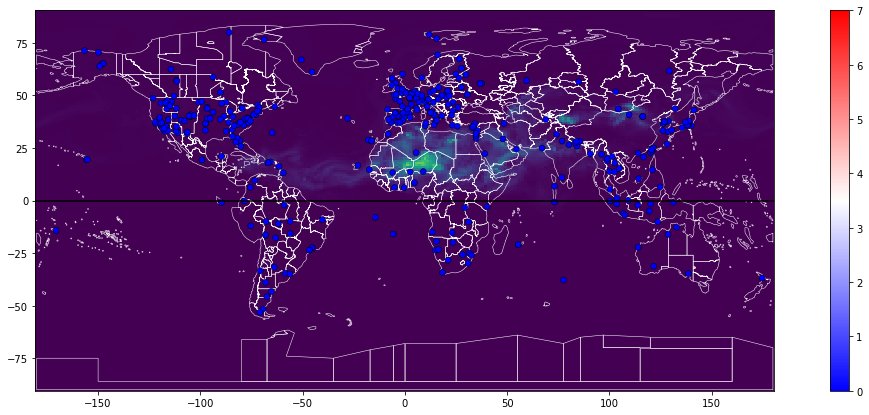

In [34]:
fig_4, ax_4 = plt.subplots(1, figsize=(20, 7))

gdf_model.plot(ax=ax_4, column='od550du', cmap='viridis', vmin=0, vmax=3)

gdf_earth.plot(ax=ax_4, facecolor="none", edgecolor='white', lw=0.5)

gdf_diff.plot(ax=ax_4, column='relative_difference', cmap='bwr', edgecolor='black', legend=True, lw=0.5, vmax = 7)

ax_4.axhline(y=0, color='black')

ax_4.margins(0)

In [35]:
gdf_diff['relative_difference'].min()

-5.42936377802335e-06

In [36]:
gdf_diff['relative_difference'].max()

5.685945534240913e-06

In [37]:
gdf_diff.loc[gdf_diff['relative_difference'] == gdf_diff['relative_difference'].max()]

geometry  providentia       nes  obs  \
FID                                                          
90   POINT (99.04540 19.93245)     0.065191  0.065191  NaN   

     absolute_difference  relative_difference  
FID                                            
90          3.706749e-09             0.000006

#### 6.1.3. Scatter plots between interpolated values

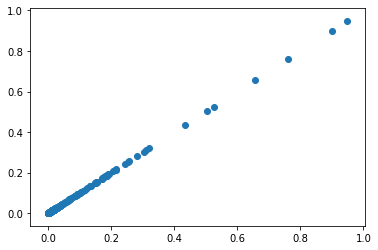

In [38]:
plt.scatter(gdf_diff['providentia'], gdf_diff['nes'])

#### 6.1.4. Scatter plots between interpolated values and observations

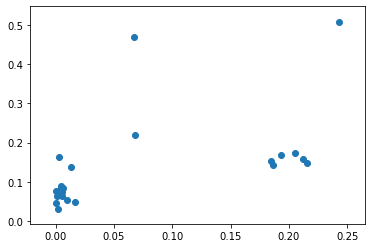

In [39]:
plt.scatter(gdf_diff['nes'], gdf_diff['obs'])

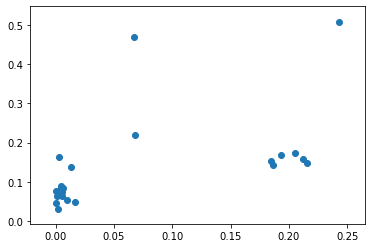

In [40]:
plt.scatter(gdf_diff['providentia'], gdf_diff['obs'])

### 6.2. Numeric comparison

#### 6.2.1. Add model data

In [41]:
gdf_eval = copy.deepcopy(gdf_model)
gdf_eval.rename(columns={'od550du': 'model'}, inplace=True)
gdf_eval

geometry     model
FID                                                               
0      POLYGON ((-180.70312 -90.50000, -179.29688 -90...  0.000144
1      POLYGON ((-179.29688 -90.50000, -177.89062 -90...  0.000144
2      POLYGON ((-177.89062 -90.50000, -176.48438 -90...  0.000144
3      POLYGON ((-176.48438 -90.50000, -175.07812 -90...  0.000144
4      POLYGON ((-175.07812 -90.50000, -173.67188 -90...  0.000144
...                                                  ...       ...
46512  POLYGON ((173.67188 89.50000, 175.07812 89.500...  0.023041
46513  POLYGON ((175.07812 89.50000, 176.48438 89.500...  0.023041
46514  POLYGON ((176.48438 89.50000, 177.89062 89.500...  0.023041
46515  POLYGON ((177.89062 89.50000, 179.29688 89.500...  0.023041
46516  POLYGON ((179.29688 89.50000, 180.70312 89.500...  0.023041

[46517 rows x 2 columns]

#### 6.2.2. Add observations data

In [42]:
gdf_eval = gdf_eval.sjoin(data_obs.shapefile.rename(columns={'od550aero': 'obs'}))
gdf_eval = gdf_eval.drop(columns=['index_right'])
gdf_eval

geometry     model  obs
FID                                                                    
9587   POLYGON ((-71.01562 -53.50000, -69.60938 -53.5...  0.000458  NaN
9845   POLYGON ((-69.60938 -52.50000, -68.20312 -52.5...  0.000429  NaN
11388  POLYGON ((-68.20312 -46.50000, -66.79688 -46.5...  0.000508  NaN
12161  POLYGON ((-65.39062 -43.50000, -63.98438 -43.5...  0.001136  NaN
13187  POLYGON ((-68.20312 -39.50000, -66.79688 -39.5...  0.002681  NaN
...                                                  ...       ...  ...
41394  POLYGON ((-156.79688 70.50000, -155.39062 70.5...  0.013695  NaN
42998  POLYGON ((-69.60938 76.50000, -68.20312 76.500...  0.013201  NaN
43058  POLYGON ((14.76562 76.50000, 16.17188 76.50000...  0.017579  NaN
43569  POLYGON ((10.54688 78.50000, 11.95312 78.50000...  0.013934  NaN
43757  POLYGON ((-86.48438 79.50000, -85.07812 79.500...  0.011777  NaN

[366 rows x 3 columns]

#### 6.2.3. Add NES data

In [43]:
gdf_eval = gdf_eval.sjoin(gdf_nes.rename(columns={'od550du': 'nes'}))
gdf_eval = gdf_eval.drop(columns=['index_right'])
gdf_eval

geometry     model  obs  \
FID                                                                       
9587   POLYGON ((-71.01562 -53.50000, -69.60938 -53.5...  0.000458  NaN   
9845   POLYGON ((-69.60938 -52.50000, -68.20312 -52.5...  0.000429  NaN   
11388  POLYGON ((-68.20312 -46.50000, -66.79688 -46.5...  0.000508  NaN   
12161  POLYGON ((-65.39062 -43.50000, -63.98438 -43.5...  0.001136  NaN   
13187  POLYGON ((-68.20312 -39.50000, -66.79688 -39.5...  0.002681  NaN   
...                                                  ...       ...  ...   
41394  POLYGON ((-156.79688 70.50000, -155.39062 70.5...  0.013695  NaN   
42998  POLYGON ((-69.60938 76.50000, -68.20312 76.500...  0.013201  NaN   
43058  POLYGON ((14.76562 76.50000, 16.17188 76.50000...  0.017579  NaN   
43569  POLYGON ((10.54688 78.50000, 11.95312 78.50000...  0.013934  NaN   
43757  POLYGON ((-86.48438 79.50000, -85.07812 79.500...  0.011777  NaN   

            nes  
FID              
9587   0.000420  
9845   0.000441  
11388  0.000532  
12161  0.001565  
13187  0.001954  
...         ...  
41394  0.013110  
42998  0.013245  
43058  0.017365  
43569  0.014070  
43757  0.011703  

[512 rows x 4 columns]

#### 6.2.4. Add Providentia Interpolation data

In [44]:
gdf_eval = gdf_eval.sjoin(gdf_prv_after.rename(columns={'od550aero': 'providentia'}))
gdf_eval = gdf_eval.drop(columns=['index_right'])
gdf_eval

geometry     model  obs  \
FID                                                                       
9587   POLYGON ((-71.01562 -53.50000, -69.60938 -53.5...  0.000458  NaN   
9845   POLYGON ((-69.60938 -52.50000, -68.20312 -52.5...  0.000429  NaN   
11388  POLYGON ((-68.20312 -46.50000, -66.79688 -46.5...  0.000508  NaN   
12161  POLYGON ((-65.39062 -43.50000, -63.98438 -43.5...  0.001136  NaN   
13187  POLYGON ((-68.20312 -39.50000, -66.79688 -39.5...  0.002681  NaN   
...                                                  ...       ...  ...   
41394  POLYGON ((-156.79688 70.50000, -155.39062 70.5...  0.013695  NaN   
42998  POLYGON ((-69.60938 76.50000, -68.20312 76.500...  0.013201  NaN   
43058  POLYGON ((14.76562 76.50000, 16.17188 76.50000...  0.017579  NaN   
43569  POLYGON ((10.54688 78.50000, 11.95312 78.50000...  0.013934  NaN   
43757  POLYGON ((-86.48438 79.50000, -85.07812 79.500...  0.011777  NaN   

            nes  providentia  
FID                           
9587   0.000420     0.000420  
9845   0.000441     0.000441  
11388  0.000532     0.000532  
12161  0.001565     0.001565  
13187  0.001954     0.001954  
...         ...          ...  
41394  0.013110     0.013110  
42998  0.013245     0.013245  
43058  0.017365     0.017365  
43569  0.014070     0.014070  
43757  0.011703     0.011703  

[954 rows x 5 columns]

#### 6.2.5. Calculate relative difference between NES and Providentia

In [45]:
gdf_eval['nes-prov'] = (gdf_eval['nes'] - gdf_eval['providentia'])*100 / gdf_eval['nes']
gdf_eval

geometry     model  obs  \
FID                                                                       
9587   POLYGON ((-71.01562 -53.50000, -69.60938 -53.5...  0.000458  NaN   
9845   POLYGON ((-69.60938 -52.50000, -68.20312 -52.5...  0.000429  NaN   
11388  POLYGON ((-68.20312 -46.50000, -66.79688 -46.5...  0.000508  NaN   
12161  POLYGON ((-65.39062 -43.50000, -63.98438 -43.5...  0.001136  NaN   
13187  POLYGON ((-68.20312 -39.50000, -66.79688 -39.5...  0.002681  NaN   
...                                                  ...       ...  ...   
41394  POLYGON ((-156.79688 70.50000, -155.39062 70.5...  0.013695  NaN   
42998  POLYGON ((-69.60938 76.50000, -68.20312 76.500...  0.013201  NaN   
43058  POLYGON ((14.76562 76.50000, 16.17188 76.50000...  0.017579  NaN   
43569  POLYGON ((10.54688 78.50000, 11.95312 78.50000...  0.013934  NaN   
43757  POLYGON ((-86.48438 79.50000, -85.07812 79.500...  0.011777  NaN   

            nes  providentia      nes-prov  
FID                                         
9587   0.000420     0.000420 -2.566510e-08  
9845   0.000441     0.000441 -9.883448e-07  
11388  0.000532     0.000532  3.343764e-06  
12161  0.001565     0.001565  3.318575e-06  
13187  0.001954     0.001954 -5.429364e-06  
...         ...          ...           ...  
41394  0.013110     0.013110 -1.945477e-06  
42998  0.013245     0.013245 -2.473612e-06  
43058  0.017365     0.017365  4.490074e-06  
43569  0.014070     0.014070  2.019532e-06  
43757  0.011703     0.011703 -3.059476e-06  

[954 rows x 6 columns]

In [46]:
# Difference is higher now because we have used spatial joins (nearest 1 neighbour vs nearest 4)
gdf_eval['nes-prov'].max()

31.754816180063894

In [47]:
# Difference is higher now because we have used spatial joins (nearest 1 neighbour vs nearest 4)
gdf_eval['nes-prov'].min()

-46.530489827009234

#### 6.2.6. Scatter plot between model and interpolated values

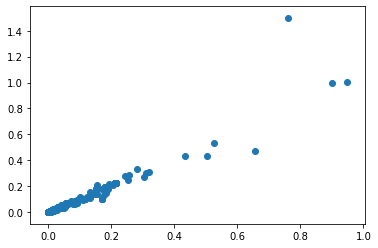

In [48]:
plt.scatter(gdf_eval['providentia'], gdf_eval['model'])

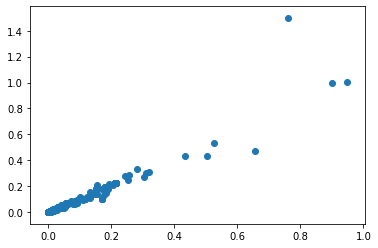

In [49]:
plt.scatter(gdf_eval['nes'], gdf_eval['model'])